# Machine Team 4 (Michael DiSanto, Dawn Massey & Brian Nicholls)
## BA545: Data Mining - Competition #2 (Online Shoppers' Purchasing Intentions)
### Data Audit Report - Spring 2020


<img src="https://i.ytimg.com/vi/CRKn-9gVNBw/maxresdefault.jpg" width=60%/>

Note: This work was completed using the CRISP-DM Framework shown above; accordingly, it will serve as an organizing framework for this report.

#### **Table of Contents:**

0. [Part 0: Preparing for Analysis](#part0)
1. [Part I: Business Issue Understanding](#part1)
2. [Part II: Data Understanding & Exploratory Data Analysis (EDA)](#part2)
3. [Part III: Data Preparation](#part3)

#### **Note: Parts IV onward are for future work**
4. [Part IV: Data Analysis/Modeling](#part4)
5. [Part V: Validation](#part5)
6. [Part VI: Presentation/Visualization](#part6)
7. [Part VII: Sources](#part7)



# Part 0: Preparing for Analysis  <a name="part0"></a>
#### Import the necesary packages for reading, analyzing, tidying, medeling, & evaluating the data

In [88]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [89]:
# Processing the data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test
from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)
from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
from sklearn.svm import SVC 
# svc = SVC(kernel='linear')
from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)
from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)


# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report 
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 

In [90]:
df = pd.read_csv('online_shoppers_intention.csv', na_values=r'-')

# Part I: Business Issue Understanding  <a name="part1"></a>

## A. Research Question:
Overall, this project's research question is: *What drives potential customers to make purchases?*

## B. Scope of Work:
This project is a classification project in which the members of Machine Team 4 (Michael DiSanto, Dawn Massey and Brian Nicholls) will use the data feature, Revenue, as the target feature when predicing whether a consumer made a purchase and, thus, is part of Class 1 (i.e., if Revenue > 0) or, instead, whether the consumer did not make a purchase and, thus, is part of Class 0 (i.e., if Revenue <= 0). 

Using the 10 numerical (continous) and 8 categorical features in the given dataset, members of the team we will utilize advanced and novel methods in preparing the data to design and implement a model for the client that will predict whether a site visitors will make a purchase. The model will be evaluated on the basis of its prediction accuracy and its predictive power. 

Deliverable due dates are as follows:
*     Data Audit Report due Tuesday, March 31, 2020
*     Initial Data Model due Tuesday, April 14, 2020
*     Final Presentation and Report due Tuesday, April 28, 2020

## C. Business Understanding:
Online shopping is an important revenue source for many retail businesses, such as our client. According to Sakar et al. (2019), desipte increases in e-commerce traffic in the recent past, "conversion" (of browsers to purchasers) has not increased proportionately. Indeed, the dataset includes 12,330 "sessions," of which only 1908 (15.5%) resulted in conversion (Sakar et al. 2019, 6895). Thus, it is very important for retail companies, such as our client, to better understand - in real time - the cues that drive conversion. Complicating the process is that unlike "brick and mortar" stores where shoppers can interact with salespeople who, in turn, can help to facilitate (or at least understand) customer conversion on the basis of their interaction, online retail businesses must *infer* customer behavior from other cues. But, what are those cues for our client? As part of determining whether a "browser" will become a "purchaser," our client also might like to know about the cues suggesting the opposite behavior - i.e., abandoning the site or the shopping cart. Additionally, the client might like to know why customers purchasing competitors' products fail to visit their website. On the basis of our models, our client is interested in knowing what we might suggest doing (in real time) to increase conversion/reduce abandonment. Further our client might also like to know if we believe there are other factors that have not been captured in the dataset that might be helpful in better predicting conversion/abandonment in the future as well as figuring out how to attract to the client's websitem consumers who make purchases on competitors' websites.

Past research has focused on: 
clickstream data
session information
session length in terms of the number of Web pages visited in a session
session duration in seconds
average time per page in seconds
traffic type (representing the page that referred the user to a particular (bookstore) site
three binary variables representing a set of key perations related to the commercial intent
a set of product categories viewed during the session 
sequential data/most frequently followed navigation paths
(see Sakar et al. 2019, p. 6894, ff.)


### _Reference:_
Sakar, C., S. Polat, M. Katircioglu and Y. Kastro. 2019. Real-time predicgion of online shoppers' purchasing intention using multilayer perceptron and LSTM recurrent neural networks. *Neural Computing and Applications 31:* 6893-6908.


# Part II: Data Understanding & Exploratory Data Analysis  <a name="part2"></a>

## A. Data Understanding
Data Understanding includes providing an overview of the dataset, conducting exploratory data analysis, verifying data quality, and deciding how to address data quality issues.

#### _1. Overview of Dataset_
The dataset that has been gathered for purposes of this analysis contains 18 variables: Revenue, which is the Target Variable (where Revenue = TRUE if the customer visiting the website made a purchase - i.e., Class 1; and Revenue = FALSE if the customer visiting the website did not make a purchase - i.e., Class 0); and 17 predictor variables, including 10 continuous features and 7 categorical features, each of which are listed below and then delineated within our Data Dictionary.


##### a. Continuous Features:
*     Administrative: Number of pages visited by the visitor about account management  
*     Administrative Duration: The total amount of time (in seconds) the visitor spent on account management-related pages
*     Informational: Number of pages visited by the visitor about Web site and its communciation and address information 
*     Informational Duration: The total amount of time (in seconds) the visitor spent on informational pages
*     Product Related: Number of pages visited by the visitor about product-related pages  
*     Product Related Duration: The total amount of time (in seconds) the visitor spent on product-related pages  
*     Bounce Rate: Average bounce rate value of the pages visited by the visitor
*          (Note: a "bounce" occurs when a visitor enters the site from a particular page and then leaves the site (bounces) 
*          without any further activity.)
*     Exit Rate: Average exit rate value of the pages visited by the visitor
*     Page Value: Average page value of the pages visited by the visitor
*     Special Day: Closeness of the visitor's visit to the site to a special day (e.g., Mother's Day, Valentine's Day)


##### b. Categorical Features:
*     OperatingSystems: Operating system of the visitor (8 possible operating systems)
*     Browser: Browser of the visitor (13 possible browsers)
*     Region: Geographic region from which the sesion has been started by the visitor (9 possible regions)
*     TrafficType: Traffic source by which the visitor has arrived at the Web site - e.g., banner, SMS, direct (20 possible types)
*     VisitorType: Visitor type as "New Visitor," "Returning Visitor," and "Other" (3 possible types)
*     Weekend: Boolean value indicating whether the date of the visit is a weekend (2 possible values)
*     Month: Month value for visit date (12 possible months)


##### c. Data Dictionary:

<table class="tg">
<tbody>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Data Dictionary</strong></td>
</tr>
<tr>
<tr>
<th class="tg-0pky">Variable</th>
<th class="tg-0pky">Variable Name</th>
<th class="tg-0pky">Variable Definition</th>
<th class="tg-fymr">Data Type</th>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Web Page Analytics &ndash; Numerical</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>Home Page</strong></td>
<td class="tg-fymr">Administrative</td>
<td class="tg-fymr">Number of visits to the home page by the user.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Home Page Duration</strong></td>
<td class="tg-fymr">Administrative_Duration</td>
<td class="tg-fymr">This is the length of time spent on the the home page by the user.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>About Us page</strong></td>
<td class="tg-fymr">Informational</td>
<td class="tg-fymr">Number of visits to the information page by the user.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Informational Duration</strong></td>
<td class="tg-fymr">Informational Duration</td>
<td class="tg-fymr">This is the length of time spent on the the about us page by the user.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Product page</strong></td>
<td class="tg-fymr">ProductRelated</td>
<td class="tg-fymr">Number of visits to the product page by the user.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Product Related Duration</strong></td>
<td class="tg-fymr">ProductRelated_Duration</td>
<td class="tg-fymr">This is the length of time spent viewing the products page by the user</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Bounce Rate</strong></td>
<td class="tg-fymr">BounceRates</td>
<td class="tg-fymr">The percentage of single page visits (or web sessions). It is the percentage of visits in which a person leaves your website from the landing page without browsing any further.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Exit Rate</strong></td>
<td class="tg-fymr">ExitRates</td>
<td class="tg-fymr">For all pageviews to the page, Exit Rate is the percentage that were the last in the session</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Page Value</strong></td>
<td class="tg-fymr">PageValues</td>
<td class="tg-fymr">the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both). This value is intended to give you an idea of which page in your site contributed more to your site's revenue.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Special Day</strong></td>
<td class="tg-fymr">SpecialDay</td>
<td class="tg-fymr">the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.</td>
<td class="tg-0pky">Continuous/Float</td>
</tr>
<tr>
<td class="tg-7btt" style="text-align: center;" colspan="4"><strong>Web Page Analytics &ndash;Categorical</strong></td>
</tr>
<tr>
<td class="tg-0pky"><strong>Month</strong></td>
<td class="tg-fymr">Month</td>
<td class="tg-fymr">Month in which the visit took place</td>
<td class="tg-0pky">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>OperatingSystems</strong></td>
<td class="tg-fymr">OperatingSystems</td>
<td class="tg-fymr">Operating system of the computer in which the user used while viewing the site</td>
<td class="tg-0pky">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Browser</strong></td>
<td class="tg-fymr">Browser</td>
<td class="tg-fymr">Browser in which the user used to view the site</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Region</strong></td>
<td class="tg-fymr">Region</td>
<td class="tg-fymr">Region wher ethe user is located</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>TrafficType</strong></td>
<td class="tg-fymr">TrafficType</td>
<td class="tg-fymr">TBD</td>
<td class="tg-fymr">Categorical/Int</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Visitor Type</strong></td>
<td class="tg-fymr">VisitorType</td>
<td class="tg-fymr">Is this a returing visitor or a new visitor</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Weekend</strong></td>
<td class="tg-fymr">Weekend</td>
<td class="tg-fymr">Did the visit happen on the weekend?</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>
<td class="tg-0pky"><strong>Revenue</strong></td>
<td class="tg-fymr">Revenue</td>
<td class="tg-fymr">Did the visit result in Revenue?</td>
<td class="tg-fymr">Binary/Boolean</td>
</tr>
<tr>



### B. Exploratory Data Analysis (EDA) &  Data Quality Verification (DQV)


#### _1. Overview of Findings from EDA & DQV (per the below):_
*     There are 12,330 observations with one target value and 17 features.
*     There are no missing values; however, we did note the following:
    ** There are no observations for January and April - which suggests the dataset does not include a full year's-worth of information, which may limit our ability to assess monthly trends/differences.
    ** A few (85) observations were coded as "other" - meaning they were neither new nor returning customers; since "new" and "returning" customers are mutually exclusive, the observations coded as "other" appear to be erroneous.
    ** 85% of the data come from Browser 1 (20%) or 2 (65%); hence, the data are not balanced with regard to browser
    ** Approximately 90% of the data comes from days other than "Special" days
    ** 
*     Bounce Rate and Exit Rate are highly correlated at 0.91; however, they also are highly correlated with the target variable (at -0.15 for Bounce Rate and at -0.25 for Exit Rate); hence, we are reluctant to remove either from our analysis. Rather, we will consider engineering a new feature that combines Bounce Rate with Exit Rate (e.g., via a linear combination of an average or weighted average of the features).
*     Administrative Page and Exit Rates are also highly correlated at -0.43; however, they, too, are highly correlated with the target variable (at 0.62 for Adminstative Page and at -0.25 for Exit Rate); hence, we are reluctant to remove either from our analysis. Rather, we will consider engineering a new feature that combines Administative Page with Exit Rate (e.g., via a division of one feature by the other).
*     Our data is imbalanced toward Revenue = False (i.e, Class 0, no purchases).



#### _2. Descriptive Statistics:_

In [91]:
sample =df.sample(30)
sample

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3353,0,0.000000,0,0.0,12,312.666667,0.000000,0.033333,0.000000,0.0,May,1,1,1,4,Returning_Visitor,False,False
11881,0,0.000000,0,0.0,20,676.166667,0.000000,0.025000,0.000000,0.0,Nov,2,2,3,2,Returning_Visitor,False,False
1449,8,154.291667,0,0.0,34,991.367857,0.005263,0.014436,10.934825,0.0,Mar,2,2,2,2,Returning_Visitor,False,False
2360,2,39.500000,1,161.0,34,1406.209524,0.010811,0.021212,23.605189,0.2,May,2,2,8,4,Returning_Visitor,False,True
1743,1,4.000000,2,11.0,110,3211.827706,0.003571,0.012917,0.000000,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
11599,1,28.500000,0,0.0,21,1089.625000,0.010000,0.033333,0.000000,0.0,Nov,2,2,1,20,Returning_Visitor,False,False
3692,2,114.000000,0,0.0,24,368.333333,0.092593,0.114286,0.000000,0.4,May,3,2,4,3,Returning_Visitor,False,False
5085,3,108.000000,0,0.0,26,730.533333,0.011538,0.014103,0.000000,0.0,May,1,1,1,11,Returning_Visitor,False,False
10411,0,0.000000,0,0.0,74,2719.734091,0.008108,0.024324,0.000000,0.0,Nov,2,2,5,1,Returning_Visitor,False,False
4490,3,168.000000,1,27.0,57,1580.600000,0.011475,0.028331,0.000000,0.0,May,2,2,9,4,Returning_Visitor,False,False


### Observations
----------------------------------------------------------------------
##### Initial import seems to accurate and complete in comparison to the data dictionary

In [92]:
# More info on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

### Observations
----------------------------------------------------------------------
##### There are no null columns on import and 12330 rows and 18 columns
##### Month, VisitorType, Weekend, and Revenue are non-numberic attributes that may need adjustment later in the analysis.

In [93]:
# Inital description of the data
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Observations
----------------------------------------------------------------------

##### BounceRate, ExitRate, & SpecialDay are on a 0-1 scale, while the others nummerical attributies are on a differnt scale.
##### SpecialDay, OperatingSystem, Browser, Region, TrafficType are all categorical attributes which could be futher analyzed using encoding.

#### _3. Correlation Analysis:_

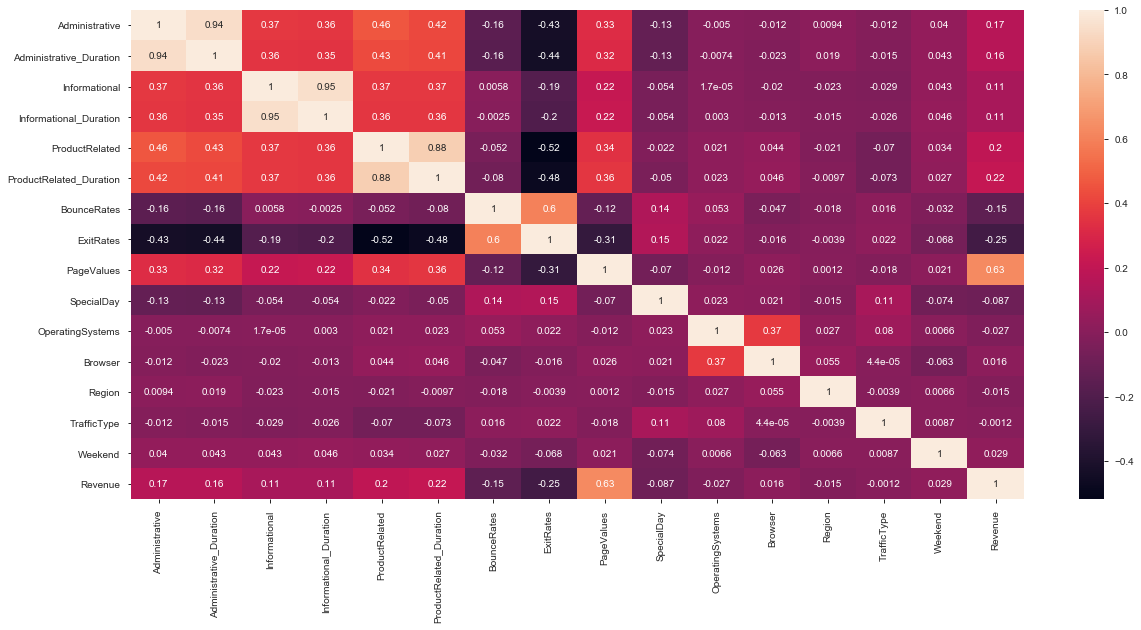

In [94]:
# Correlation Heatmap for the dataframe
spearman =df.corr(method ='spearman')
plt.figure(figsize=(20,9))
sns.heatmap(spearman, annot=True)

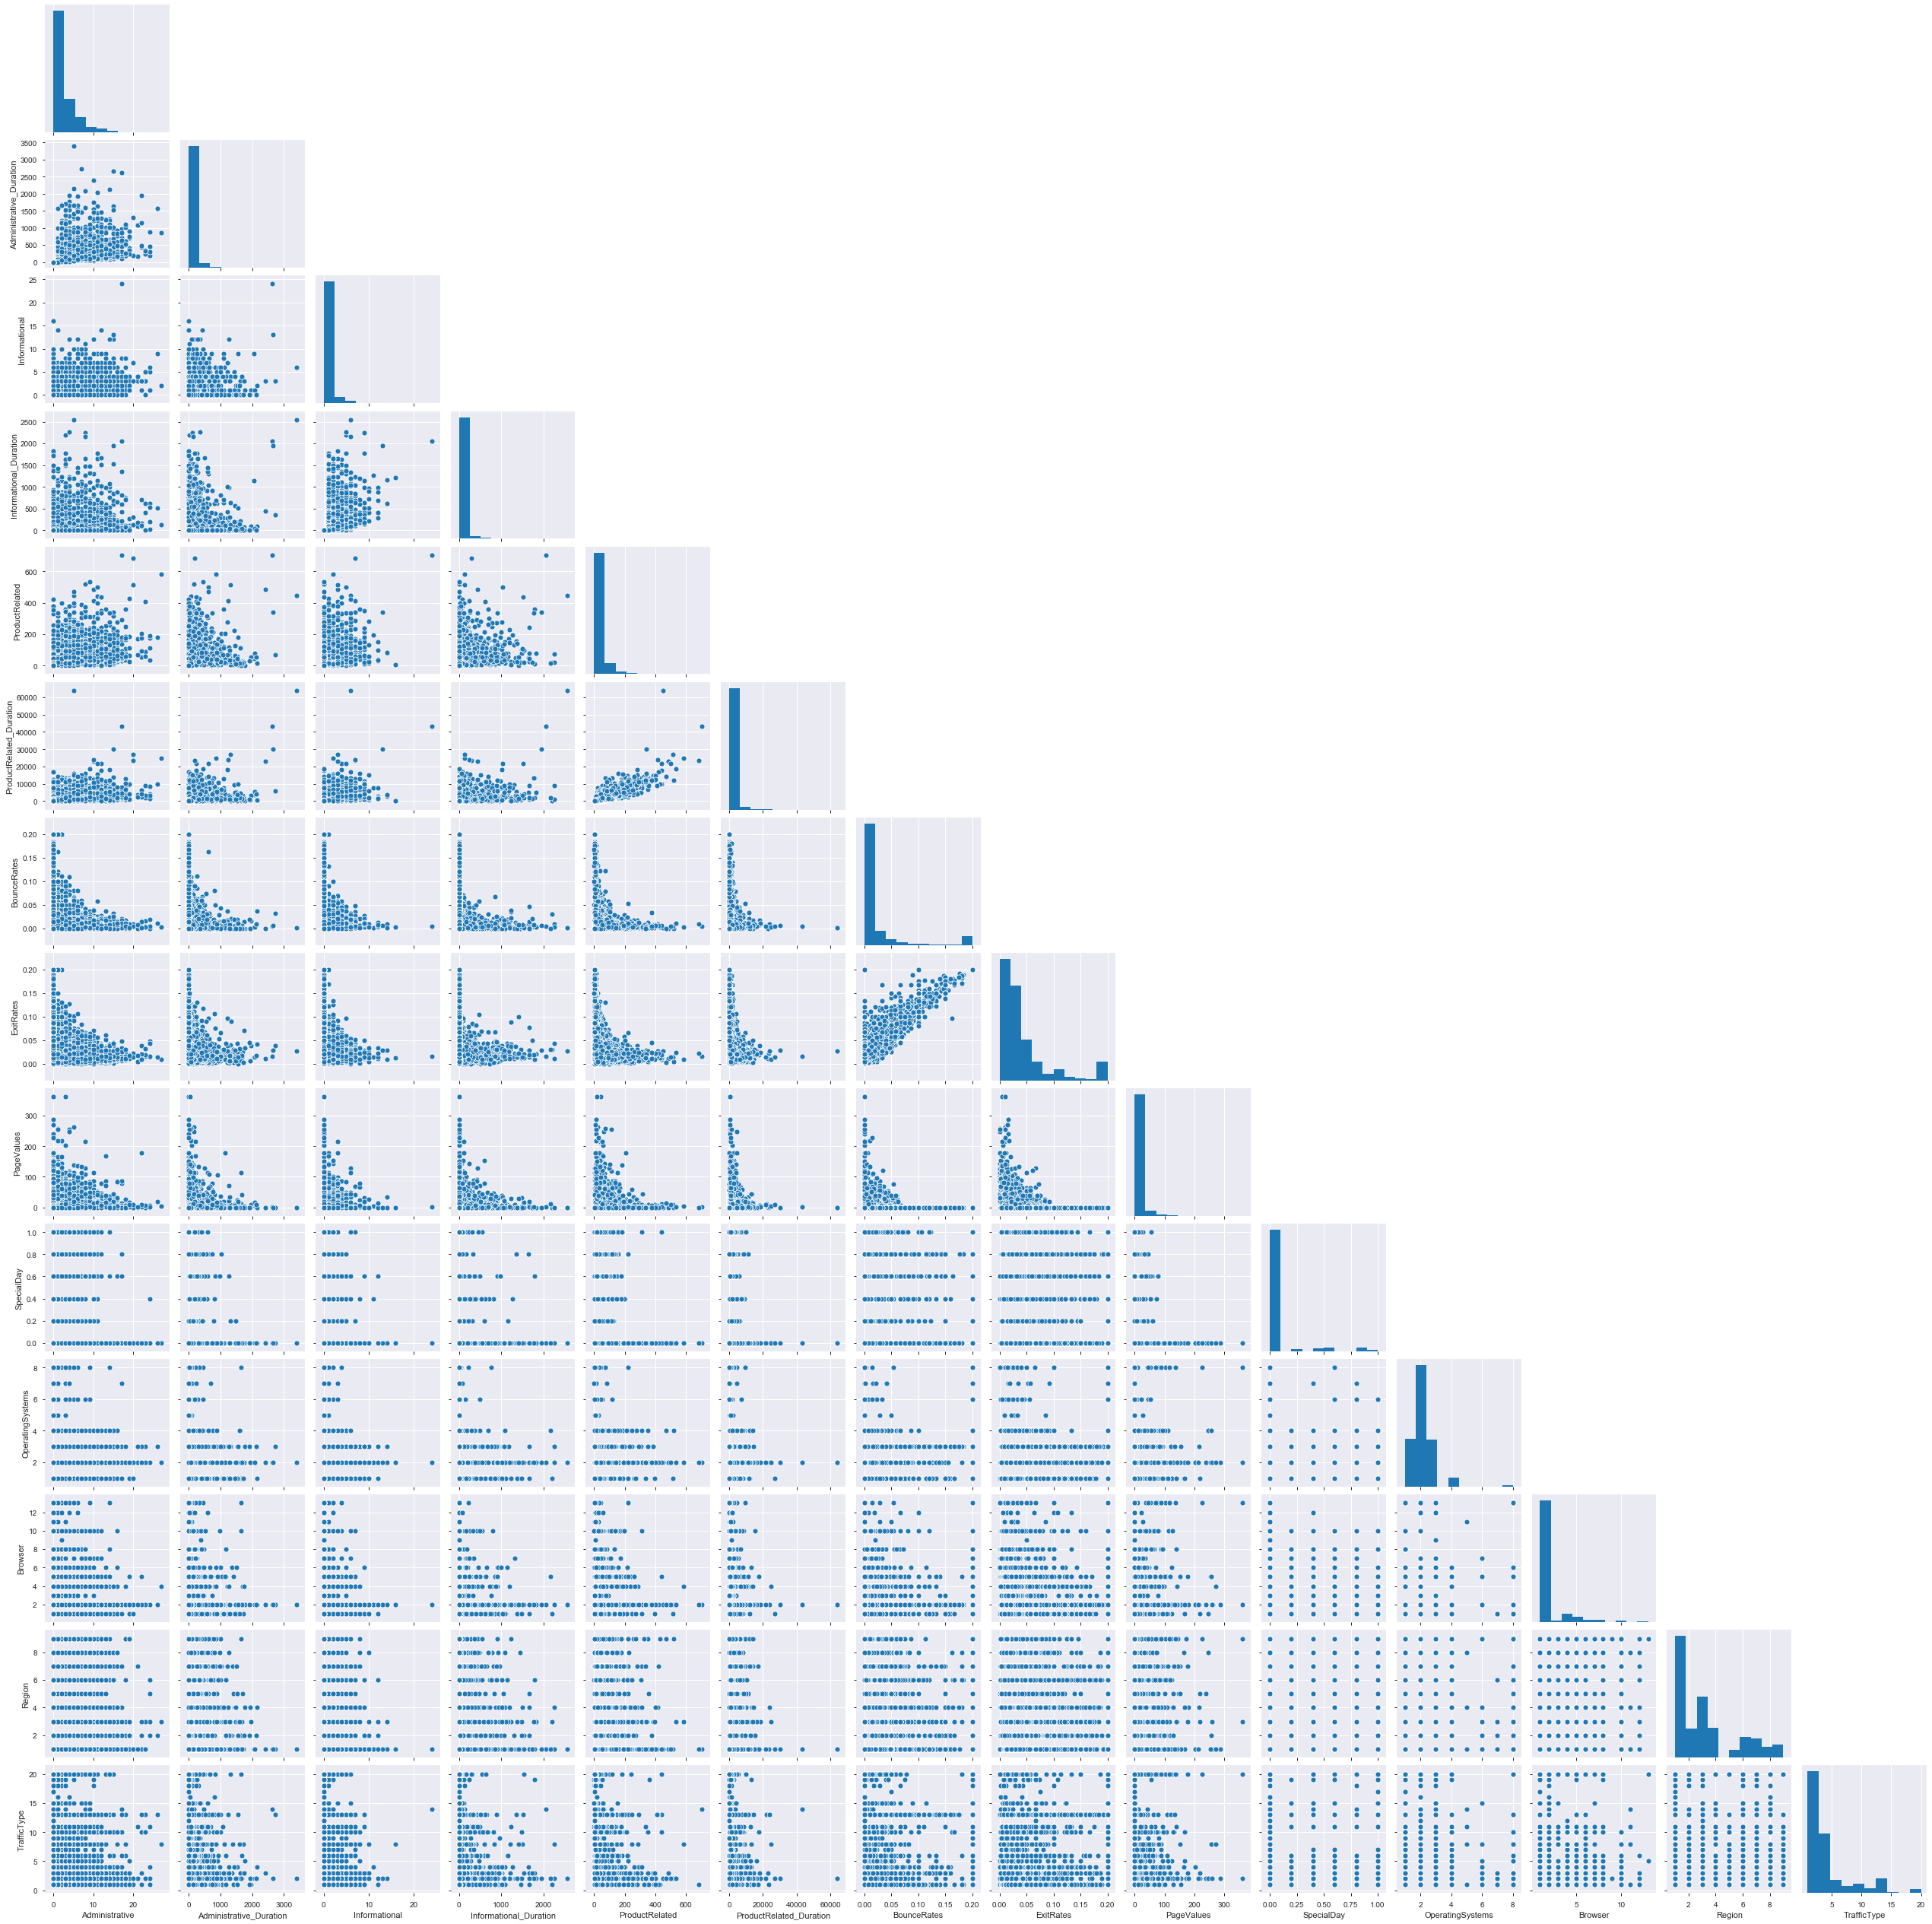

In [95]:
numerical_list=['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','OperatingSystems','Browser','Region','TrafficType']
sns.pairplot(df[numerical_list],corner=True)

### Observations
----------------------------------------------------------------------

##### We observed the following high correlations:
    - The duration attributes may need to be assesed for elimination in the final model as each is very highly correlated with its corresponding non-duration attribute.
    
    - Administrative & ProductRelated have a correlation of 0.46; this merits further investigation and possible feature engineering.
    - Administrative & ProductRelated_Duration have a correlation of 0.42; this merits further investigation and possible feature engineering.
    - Administrative & ExitRates have a correlation of -0.43; this merits further investigation and possible feature engineering.
 
    - Administrative_Duration & ExitRates have a correlation of -0.44; this merits further investigation and possible feature engineering.
    - Administrative_Duration & ProductRelated have a correlation of 0.43; this merits further investigation and possible feature engineering.
    - Administrative_Duration & ProductRelated_Duration have a correlation of 0.41; this merits further investigation and possible feature engineering. 

    - ProductRelated & ExitRates have a correlation of -0.52; this merits further investigation and possible feature engineering.
 
    - ProductRelated_Duration & ExitRates have a correlation of -0.48; this merits further investigation and possible feature engineering.
    
    - BounceRate & ExitRates have a correlation of 0.6; this merits further investigation and possible feature engineering.

    - ProductRelated & ExitRates have a correlation of -0.52; this merits further investigation and possible feature engineering.
    
    - PageValues & Revenue have a correlation of 0.63; As Revenue is the target we would expect PageValues to be a useful attribute in our model.

#### _4. Prelimiary EDA Visualizations:_

In [9]:
profile = ProfileReport(df)
profile

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,18
Number of observations,12330
Total Missing (%),0.0%
Total size in memory,1.5 MiB
Average record size in memory,130.0 B
Numeric,13
Categorical,2
Boolean,2
Date,0
Text (Unique),0
Rejected,1


### Observations for Preliminary EDA/Visualizations:
----------------------------------------------------------------------

##### **Warnings – highlights:**
    -High correlation between Exit Rates and BounceRates, which we noted in the correlation map.
    -Dataset has 125 duplicate rows, which we decided to allow given that there are no unique identifiers that we could use to verify whether the apparently duplicate entries (~1% of the data) were bogus or legitimate.

##### **Variables – highlights:**

    - Administrative is a count between 0 and 27; it is right skewed (with ~66% of the dataset in 0, 1, 2)
    - Administrative_duration captures time spent; it also is right skewed with almost 50% of the data being zero (which makes sense because almost 50% of the data in Administrative is zero)

    - Informational is a count between 0 and 24; it is right skewed (with ~90% of the dataset in 0, 1, 2)
    - Informational_duration captures time spent; it also is right skewed with over 80% of the data being zero (which makes sense because over 78% of the data in Informational is zero)

    - ProductRelated is a count between 0 and 705; it is right skewed (however; only ~12% of the dataset in 0, 1, 2)
    - ProductRelated_duration captures time spent; it also is right skewed with almost 6% of the data being zero (which makes sense because only 12% of the data in ProductRelated is zero)

    - BounceRate captures the percentage of visits in which a visitors exits the landing page without browsing any further. It is right skewed, with about 45% of the data being a value of 0. Given that those who “bounce” will certainly not buy, this         attribute may well be an important variable in our model. (Note: ExitRate, which is highly correlated with BounceRate, also is likely to have a similar skewness, distribution and importance in predicting online shoppers’ purchasing behavior.)

    - PageValues are dollar amounts – more or less – amounting to sales amounts, divided by page views. The variable is right skewed with approximately 78% of PageValues being zero; this makes sense because about 45% of customers “bounce” immediately,       buying nothing, leaving another ~30% to browse without completing a purchase.

    - SpecialDay is a binary variable with 0 for not near a holiday/special day and 1 for near a holiday/special day. The variable is right skewed with approximately 90% of the data being zero (i.e., transaction not occurring near a holiday/special           day). This information suggests to us that we are dealing with a unique retail environment (i.e., most retailers experience increased activity at/during holiday times).

    - Month – is the month of the year in which the transaction occurred. We first noted that the dataset is devoid of transactions in January and April. Thus, the dataset does not appear to contain a full year of information, which could impair our         ability to complete the analysis in light of potential seasonality. The most popular months for online browsing/shopping are: May (27.3%), November (24.3%), March (15.5%) and December 14.0%). Low months include: June-October, perhaps because           folks are not browsing/shopping online during the warmer months.

    - OperatingSystems – is a categorical variable and most of the data (~95%) is in one of three operating systems (2, 1, 3). 

    - Browser – is a categorical variable and most the data (~91%) come from three browsers (2, 1, 4).

    - Region – is a categorical variable for region from which the visitor came. The top four account for ~77% of the data (i.e., region 1, 3, 4, 2).

    - TrafficType – is a categorical variable to indicate how visitor arrived at website. The top three account for approximately 67% of the referrals (i.e., types 2, 1, 3).

    - VisitorType – is a categorical variable. Most visitors (~86%) are return visitors. A few visitors have been classified as “Other”; however, they should not be so classified as the categories of “Returning_visitor” and “New_visitor” should capture       all visitors (i.e., a visitor is either one or the other).

    - Weekend – is a categorical variable to capture whether the visitor is visiting the site on a weekend. Approximately 77% of the visits took place during the week, which makes sense in light of the proportion of weekdays in a week (i.e., 5/7 =           71.4%).

    - Revenue – is the target variable. It is a categorical variable. It is imbalanced – as approximately 85% of the visits resulted in “no sale” (i.e., only ~15% of the visits resulted in sales). As such, we will need to balance the data later.


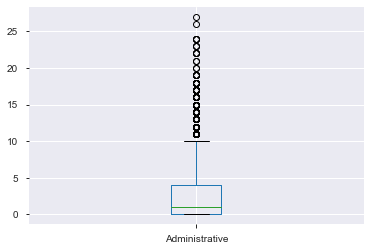

In [138]:
# Add Box Plots to further Describe the Data
# For Administrative
df_p=df.iloc[:,0]
df_p.plot.box()

In [139]:
# The group decided not to further consider the outliers because the values are not excessisvely extreme and are not outside a reasonable range.

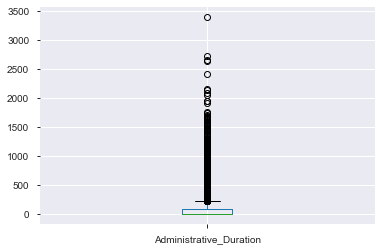

In [140]:
# For Administrative_Duration
df_p=df.iloc[:,1]
df_p.plot.box()

In [141]:
# The group decided not to further consider the outliers because there is an extrordinary amount

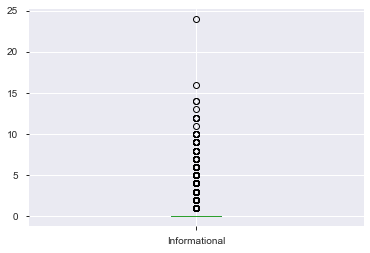

In [142]:
# For Informational
df_p=df.iloc[:,2]
df_p.plot.box()

In [143]:
# The group decided not to further consider the outliers because the values are not excessisvely extreme and are not outside a reasonable range.

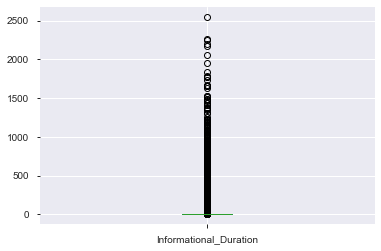

In [144]:
# For Informational_Duration
df_p=df.iloc[:,3]
df_p.plot.box()

In [145]:
# The group decided not to further consider the outliers because there is an extrordinary amount

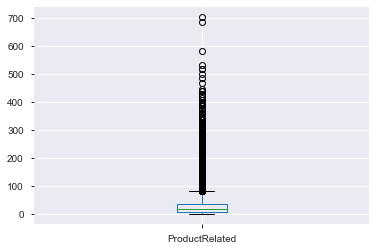

In [104]:
# For ProductRelated
df_p=df.iloc[:,4]
df_p.plot.box()

In [105]:
# The group decided not to further consider the outliers because there is an extrordinary amount

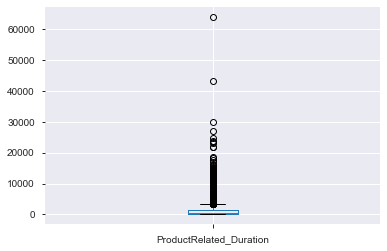

In [106]:
# For ProductRelated_Duration
df_p=df.iloc[:,5]
df_p.plot.box()

In [107]:
# The group decided not to further consider the outliers because there is an extrordinary amount

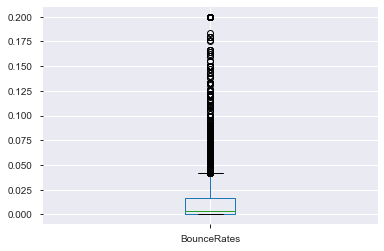

In [108]:
# For BounceRates
df_p=df.iloc[:,6]
df_p.plot.box()

In [109]:
# The group decided not to further consider the outliers because there is an extrordinary amount and the outlier values are not outside the range of 0-1

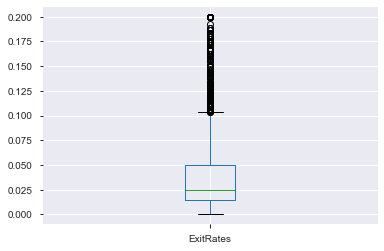

In [110]:
# For ExitRates
df_p=df.iloc[:,7]
df_p.plot.box()

In [111]:
# The group decided not to further consider the outliers because there is an extrordinary amount and the outlier values are not outside the range of 0-1

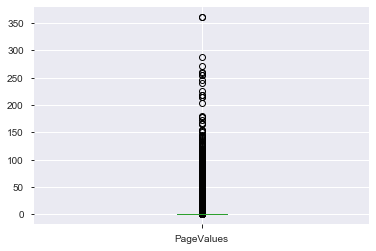

In [112]:
# For PageValues
df_p=df.iloc[:,8]
df_p.plot.box()

In [113]:
# The group decided not to further consider the outliers because there is an extrordinary amount and even the most extreme value of $350+ is reasonable considering the definition of the attribute.

### C. Data Quality Improvment Strategies
#### _1. Overview:_
Given the noted missing/erroneous values we have formulated the following pipeline...

[Notes from Jie: Be careful...some features are not continuous, but appear so...can use mean/median/moving average]

       1. Descriptive - Completed
       2. Imputation 
           - We will replace VisitorType "Other" with the mode "Returning_Visitor"
       3. Feature Engineering
           - Created 5 new variables (Admin_per_Exit; Bounce_Exit_Rate_Avg; Bounce_per_Exit_Rate; Total_Duration; Total_Duration_Avg)
           - Encoded VisitorType, Month, Weekend, and Revenue using One Hot Encoding
      
       4. Outlier Detection
           a. IQR Outlier Detection: 
               - We use the IQR to adjust issues with two of the created variables (Admin_per_Exit)
           b. Min -Max Outlier Detection
               - We initially omit this step

       5. Normalization
       
       6. Standardization
       
           a.Z-Score Standardization
               - we standardize the data using Z-scores for each variable outside the range on 0-1
           b. Steviation Outlier
              - We initially omit this step

       7. Correlations
       8. Binning
           - Binned 4 categorical variables to reduce the number of categories to five or fewer (Operating, Browser, Region and TrafficType)      
       9. Feature Selection

In [114]:
# Pipeline - Imputation:

## Replace the VisitorType 'Other' with the variable's mode, namely: 'Returning_Visitor'
df['VisitorType'] = df['VisitorType'].replace('Other','Returning_Visitor')
df.groupby('VisitorType').count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
VisitorType,,,,,,,,,,,,,,,,,
New_Visitor,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694
Returning_Visitor,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636


# Part III: Data Preparation  <a name="part3"></a>

### A. Overview
Data Preparation includes preprocessing steps for selecting data (e.g., including feature engineering/binning) and cleaning data (e.g., recoding for any "new" features created; normalizing; handling outliers; dealing with skewness; standardizing; reviewing correlations to identify highly related/correlated features that s/b avoided in the analysis).

## Feature Engineering

In [115]:
# Pipeline - Feature Engineering:
# Created 5 new variables (Admin_per_Exit; Bounce_Exit_Rate_Avg; Bounce_per_Exit_Rate; Total_Duration; Total_Duration_Avg)


#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Admin_per_Exit'] = df['Administrative'] / df['ExitRates']

#Create 'Bounce_Exit_Rate_Avg' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_Exit_Rate_Avg'] = (df['BounceRates'] + df['ExitRates'])/2

#Create 'Bounce_per_Exit_Rate' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_per_Exit_Rate'] = df['BounceRates'] / df['ExitRates']


#Create 'Total_Duration' and 'Total_Duration_Avg' to enable us to assess total and average duration, respectively.
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Total_Duration_Avg'] = (df['Total_Duration'])/3

display(df[['Administrative', 'ExitRates', 'Admin_per_Exit', 'BounceRates', 'Bounce_Exit_Rate_Avg', 'Bounce_per_Exit_Rate',\
            'Administrative_Duration','Informational_Duration', 'ProductRelated_Duration', 'Total_Duration', 'Total_Duration_Avg']].sample(20))

,Administrative,ExitRates,Admin_per_Exit,BounceRates,Bounce_Exit_Rate_Avg,Bounce_per_Exit_Rate,Administrative_Duration,Informational_Duration,ProductRelated_Duration,Total_Duration,Total_Duration_Avg
6950,9,0.018933,475.352121,0.000000,0.009467,0.000000,124.426667,0.000000,720.676667,845.103333,281.701111
1453,0,0.200000,0.000000,0.200000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9430,1,0.053333,18.750000,0.000000,0.026667,0.000000,0.000000,0.000000,94.750000,94.750000,31.583333
11490,0,0.013333,0.000000,0.000000,0.006667,0.000000,0.000000,0.000000,235.500000,235.500000,78.500000
7527,5,0.052632,95.000000,0.010526,0.031579,0.200000,83.166667,0.000000,585.566667,668.733333,222.911111
2947,0,0.060000,0.000000,0.020000,0.040000,0.333333,0.000000,0.000000,47.000000,47.000000,15.666667
568,0,0.133333,0.000000,0.066667,0.100000,0.500000,0.000000,0.000000,27.000000,27.000000,9.000000
1925,0,0.200000,0.000000,0.200000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8114,0,0.093478,0.000000,0.039130,0.066304,0.418605,0.000000,0.000000,1375.916667,1375.916667,458.638889
3879,0,0.016667,0.000000,0.000000,0.008333,0.000000,0.000000,0.000000,127.000000,127.000000,42.333333


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 23 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
Admin_per_Exi

In [117]:
#Results indicate that create values created for Admin_per_Exit and Bounce_per_Exit_Rate have some missing values; further exploration
df[['Admin_per_Exit', 'Bounce_per_Exit_Rate']].describe()

,Admin_per_Exit,Bounce_per_Exit_Rate
count,1.229200e+04,12254.000000
mean,inf,0.294123
std,NaN,0.355535
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,2.868733e+01,0.177041
75%,2.142857e+02,0.500000
max,inf,4.750000


In [118]:
# Pipeline - Binning:

##Reduce categories for Operating Systems to the top 3 plus "other"
### Operating Systems – is a categorical variable and most of the data (~95%) is in one of three operating systems (2, 1, 3). 
def binning_operating_systems(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Operating Systems > 3

df['OperatingSystems_Bin']=df['OperatingSystems'].apply(binning_operating_systems)   # Creating a new column in the df


      
##Reduce categories for Browser to the top 3 plus "other"
### Browser – is a categorical variable and most the data (~91%) come from three browsers (2, 1, 4).
def binning_browser(B):
    if (B == 3) or (B > 4): 
        return(3) 
    else:
        return(B) 

df['Browser_Bin']=df['Browser'].apply(binning_browser)   # Creating a new column in the df
      

      
##Reduce categories for Region to the top 4 plus "other"
### Region – is a categorical variable for region from which the visitor came. The top four account for ~77% of the data (i.e., region 1, 3, 4, 2).
def binning_region(B):
    if (B <= 4):
        return(B)
    else:
        return(5) # creating a category of 5 for all Regions > 4

df['Region_Bin']=df['Region'].apply(binning_region)   # Creating a new column in the df

      
      
##Reduce categories for TrafficType to the top 3 plus "other"
### TrafficType – is a categorical variable to indicate how visitor arrived at website. The top three account for approximately 67% of the referrals (i.e., types 2, 1, 3).
def binning_traffic_type(B):
    if (B <= 3):
        return(B)
    else:
        return(4) # creating a category of 4 for all Traffic Types > 3

df['TrafficType_Bin']=df['TrafficType'].apply(binning_traffic_type)   # Creating a new column in the df



##Reduce months to the top 4 in which there are transactions and "other"
### Months – is a boolean variable to the month of the internet visits. The top four months(May, November, March and December, respectively) account for almost  three account for approximately 80% of visits.
def month_bin_func(month) :
    if month == 'May':
        return int(5)
    elif month == 'Nov':
        return int(11)
    elif month == 'Mar':
        return int(3)
    elif month == 'Dec':
        return int(12)
    else:
        return int(0)
    
df['Month_Bin'] = df['Month'].apply(month_bin_func)

display(df[['OperatingSystems', 'OperatingSystems_Bin', 'TrafficType', 'TrafficType_Bin', 'Browser', 'Browser_Bin', 'Region', 'Region_Bin', 'Month', 'Month_Bin']].sample(20))


,OperatingSystems,OperatingSystems_Bin,TrafficType,TrafficType_Bin,Browser,Browser_Bin,Region,Region_Bin,Month,Month_Bin
4701,2,2,2,2,2,2,3,3,May,5
4224,3,3,3,3,2,2,9,5,May,5
5836,2,2,2,2,2,2,9,5,Sep,0
3903,1,1,3,3,1,1,3,3,May,5
4254,2,2,13,4,2,2,1,1,May,5
4411,2,2,4,4,2,2,9,5,May,5
4940,3,3,4,4,2,2,1,1,May,5
6171,4,4,1,1,1,1,2,2,Sep,0
4513,2,2,6,4,2,2,7,5,May,5
2382,2,2,2,2,2,2,1,1,May,5


In [119]:
# Pipeline - Encoding:
oh_enc = OneHotEncoder(sparse=False) # initializing One-Hot Encoder Function

## One-Hot for VisitorType to create new columns for 'Returning_Visitor' and 'New_Visitor'
encoder_visitortype = df[['VisitorType']].values
visitortype_encoded = encoder_visitortype.reshape(len(encoder_visitortype), 1)
visitortype_onehot_encoded = oh_enc.fit_transform(visitortype_encoded)
visitortype_onehot_df = pd.DataFrame(visitortype_onehot_encoded, columns = ["Returning_Visitor", "New_Visitor"])
visitortype_onehot_df.head()

## Creating list for newly-created columns for VisitorType
visitor_list = visitortype_onehot_df.columns


## One-Hot for Weekend to create new columns for 'Is_Weekend' and 'Not_Weekend'
encoder_weekend = df[['Weekend']].values
weekend_encoded = encoder_weekend.reshape(len(encoder_weekend), 1)
weekend_onehot_encoded = oh_enc.fit_transform(weekend_encoded)
weekend_onehot_df = pd.DataFrame(weekend_onehot_encoded, columns = ["Not_Weekend", "Is_Weekend"])
weekend_onehot_df.head()

## Creating list for newly-created columns for Weekend
weekend_list = weekend_onehot_df.columns


## One-Hot for Month to create new columns for "Month_May", "Month_Nov","Month_Mar", "Month_Dec", "Month_Other"
encoder_month = df[['Month_Bin']].values
month_onehot_encoded = oh_enc.fit_transform(encoder_month)
month_onehot_df = pd.DataFrame(month_onehot_encoded,  columns = ["Month_May", "Month_Nov","Month_Mar", "Month_Dec", "Month_Other"])
month_onehot_df.head()

## Creating list for newly-created columns for Month
month_list = month_onehot_df.columns
df [month_list] = month_onehot_df.loc[:,month_list]
df['VisitorType'] = df['VisitorType'].replace('Other','Returning_Visitor')


## One-Hot Encoding for Y to separate into two new columns for 'Sale' and 'No_Sale'
encoder_revenue = df[['Revenue']].values
revenue_encoded = encoder_revenue.reshape(len(encoder_revenue), 1)
revenue_onehot_encoded = oh_enc.fit_transform(revenue_encoded)
revenue_onehot_df = pd.DataFrame(revenue_onehot_encoded, columns = ["No_Sale", "Sale"])
revenue_onehot_df.head(30)

## Creating list for newly-created columns for Y
rev_list = revenue_onehot_df.columns

## Code to add newly created columns to the df
df [month_list] = month_onehot_df.loc[:,month_list]
df [visitor_list] = visitortype_onehot_df.loc[:,visitor_list]
df [weekend_list] = weekend_onehot_df.loc[:,weekend_list]
df [rev_list] = revenue_onehot_df.loc[:,rev_list]


In [120]:
df.sample(20)
# Sample the data to ensure the columns were created correctly

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Nov,Month_Mar,Month_Dec,Month_Other,Returning_Visitor,New_Visitor,Not_Weekend,Is_Weekend,No_Sale,Sale
1601,0,0.000000,0,0.000000,5,66.000000,0.000000,0.053333,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
12219,0,0.000000,0,0.000000,6,199.250000,0.000000,0.033333,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
5019,8,224.000000,0,0.000000,16,315.250000,0.000000,0.011111,0.000000,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1836,0,0.000000,0,0.000000,18,550.500000,0.000000,0.031481,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
11845,12,246.252381,2,56.500000,102,4264.419078,0.007784,0.019834,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2853,0,0.000000,0,0.000000,9,108.000000,0.000000,0.042222,0.000000,0.4,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5602,1,80.600000,0,0.000000,21,479.585714,0.005000,0.010556,10.897618,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4182,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5936,0,0.000000,0,0.000000,49,1571.123810,0.004255,0.010638,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
8588,9,474.000000,0,0.000000,19,805.650000,0.001242,0.019398,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [121]:
# Data Preparation

def replace_columns_outliers_iqr(df, column_list): 
    for my_col in column_list:
        Q1 = df[my_col].quantile(0.25)
        Q3 = df[my_col].quantile(0.75)
        IQR = Q3 - Q1

        u_bound_q3 = (Q3 + 1.5 * IQR)
        l_bound_q1 = (Q1 - 1.5 * IQR)

        df[my_col][df[my_col] > u_bound_q3] = u_bound_q3
        df[my_col][df[my_col] < l_bound_q1] = l_bound_q1

In [122]:
replace_columns_outliers_iqr(df=df, column_list=['Admin_per_Exit']) 
df['Admin_per_Exit'].describe()

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count    12292.000000
mean       132.746460
std        184.964995
min          0.000000
25%          0.000000
50%         28.687333
75%        214.285712
max        535.714280
Name: Admin_per_Exit, dtype: float64

In [123]:
# The Admin_per Exit no longer has an inf max or mean.

In [124]:
df.isnull().sum()

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates                 0
ExitRates                   0
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
Admin_per_Exit             38
Bounce_Exit_Rate_Avg        0
Bounce_per_Exit_Rate       76
Total_Duration              0
Total_Duration_Avg          0
OperatingSystems_Bin        0
Browser_Bin                 0
Region_Bin                  0
TrafficType_Bin             0
Month_Bin                   0
Month_May                   0
Month_Nov                   0
Month_Mar                   0
Month_Dec                   0
Month_Other                 0
Returning_

In [125]:
# Data Preparation

## Impute mean values for mising values in Admin_per_Exit
df['Admin_per_Exit'].fillna(df['Admin_per_Exit'].mean(), inplace=True)


## Impute mean values for missing values in Bounce_per_Exit_Rate
df['Bounce_per_Exit_Rate'].fillna(df['Bounce_per_Exit_Rate'].mean(), inplace=True)

## Check the df
df.isnull().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
Admin_per_Exit             0
Bounce_Exit_Rate_Avg       0
Bounce_per_Exit_Rate       0
Total_Duration             0
Total_Duration_Avg         0
OperatingSystems_Bin       0
Browser_Bin                0
Region_Bin                 0
TrafficType_Bin            0
Month_Bin                  0
Month_May                  0
Month_Nov                  0
Month_Mar                  0
Month_Dec                  0
Month_Other                0
Returning_Visitor          0
New_Visitor   

In [126]:
# Subsettingthe data to be used for modeling
display(df.dtypes)
df_list =  df.columns
df_list

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
Admin_per_Exit             float64
Bounce_Exit_Rate_Avg       float64
Bounce_per_Exit_Rate       float64
Total_Duration             float64
Total_Duration_Avg         float64
OperatingSystems_Bin         int64
Browser_Bin                  int64
Region_Bin                   int64
TrafficType_Bin              int64
Month_Bin                    int64
Month_May           

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'Admin_per_Exit', 'Bounce_Exit_Rate_Avg',
       'Bounce_per_Exit_Rate', 'Total_Duration', 'Total_Duration_Avg',
       'OperatingSystems_Bin', 'Browser_Bin', 'Region_Bin', 'TrafficType_Bin',
       'Month_Bin', 'Month_May', 'Month_Nov', 'Month_Mar', 'Month_Dec',
       'Month_Other', 'Returning_Visitor', 'New_Visitor', 'Not_Weekend',
       'Is_Weekend', 'No_Sale', 'Sale'],
      dtype='object')

In [127]:
numeric_list =['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType','Admin_per_Exit', 'Bounce_Exit_Rate_Avg',
       'Bounce_per_Exit_Rate', 'Total_Duration', 'Total_Duration_Avg',
       'OperatingSystems_Bin', 'Browser_Bin', 'Region_Bin', 'TrafficType_Bin',
       'Month_Bin', 'Month_May', 'Month_Nov', 'Month_Mar', 'Month_Dec',
       'Month_Other', 'Returning_Visitor', 'New_Visitor', 'Not_Weekend',
       'Is_Weekend', 'No_Sale', 'Sale']

# Split the dataset

In [128]:
df_numeric = df[numeric_list]

In [129]:
X,y2,y1 = df_numeric.iloc[:,:-2],df_numeric.iloc[:,-1],df_numeric.iloc[:,-2]

In [130]:
X_train, X_test, y1_train, y1_test,y2_train, y2_test = train_test_split(X, y1,y2,test_size=0.3,random_state=500) 

In [131]:
X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Bin,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Other,Returning_Visitor,New_Visitor,Not_Weekend,Is_Weekend
11982,3,56.0,0,0.0,19,2117.654762,0.000000,0.014444,6.708901,0.0,...,12,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8832,2,23.0,0,0.0,39,1828.966667,0.005128,0.020085,20.592471,0.0,...,11,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3459,0,0.0,0,0.0,6,56.000000,0.040000,0.080000,0.000000,0.0,...,5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2030,1,185.0,6,263.0,6,133.333333,0.000000,0.019231,0.000000,0.0,...,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
11120,5,145.0,2,349.0,33,2161.133333,0.012821,0.044786,16.581652,0.0,...,11,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,0,0.0,0,0.0,5,97.166667,0.000000,0.033333,0.000000,0.0,...,5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3790,4,91.0,0,0.0,4,61.000000,0.000000,0.033333,0.000000,0.0,...,5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
8465,0,0.0,0,0.0,18,4293.400000,0.041176,0.064706,0.000000,0.0,...,11,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
12097,1,0.0,0,0.0,7,174.000000,0.000000,0.050000,0.000000,0.0,...,11,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## Naive Model/Baseline Model ##
>   <b> Assumption: </b> All features are usefull for Y1 & Y2!
<br><b> Calculate: </b> How many times are you right?
<br><b> Reason: </b> This can be set as the baseline for our accuracy of Y1 and Y2 - the computer model should at least beat this in order for it to be better than guessing.
<br><b> Answer: </b> 
* <b> Y1 </b>: 81.96% accuracy
* <b> Y2: </b> 81.96% accuracy (not sure about this result)

In [132]:
#Create a Gaussian Classifier
gnb1 = GaussianNB()
gnb2 = GaussianNB()

#Train the model using the training sets
gnb1.fit(X_train, y1_train)
gnb2.fit(X_train, y2_train)

#Predict the response for test dataset
y_pred1 = gnb1.predict(X_test)
y_pred2 = gnb2.predict(X_test)

In [133]:
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred1))
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred2))

Accuracy: 0.8196809948634766
Accuracy: 0.8196809948634766


In [134]:
cnf_matrix1 = metrics.confusion_matrix(y1_test, y_pred1)
cnf_matrix2 = metrics.confusion_matrix(y2_test, y_pred2)

display(cnf_matrix1)
display(cnf_matrix2)


array([[ 324,  217],
       [ 450, 2708]], dtype=int64)

array([[2708,  450],
       [ 217,  324]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

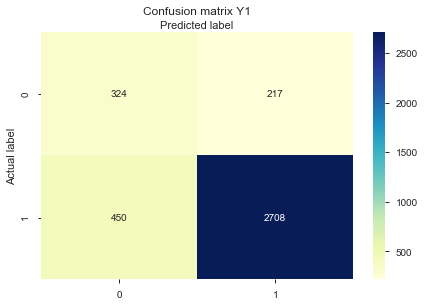

In [135]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Y1', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 257.44, 'Predicted label')

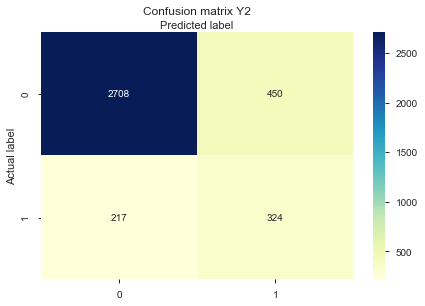

In [136]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Y2', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [137]:
print(classification_report(y1_test, y_pred1))
print(classification_report(y2_test, y_pred2))


              precision    recall  f1-score   support

         0.0       0.42      0.60      0.49       541
         1.0       0.93      0.86      0.89      3158

    accuracy                           0.82      3699
   macro avg       0.67      0.73      0.69      3699
weighted avg       0.85      0.82      0.83      3699

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89      3158
         1.0       0.42      0.60      0.49       541

    accuracy                           0.82      3699
   macro avg       0.67      0.73      0.69      3699
weighted avg       0.85      0.82      0.83      3699



# Normalization

In [77]:
skew_cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType','Admin_per_Exit', 'Bounce_Exit_Rate_Avg',
       'Bounce_per_Exit_Rate', 'Total_Duration', 'Total_Duration_Avg',
       'Browser_Bin','Month_May', 'Month_Nov', 'Month_Mar', 'Month_Dec',
       'Month_Other', 'Returning_Visitor', 'New_Visitor', 'Not_Weekend',
       'Is_Weekend' ]
for i  in skew_cols:

    X[i+'_skew'] = X[i]

#data.columns[67:]

#https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame
#from skew_autotransform import skew_autotransform

cols_to_skew = ['Administrative_skew', 'Administrative_Duration_skew', 'Informational_skew',
       'Informational_Duration_skew', 'ProductRelated_skew', 'ProductRelated_Duration_skew',
       'BounceRates_skew', 'ExitRates_skew', 'PageValues_skew', 'SpecialDay_skew',
       'OperatingSystems_skew', 'Browser_skew', 'Region_skew', 'TrafficType_skew','Admin_per_Exit_skew', 'Bounce_Exit_Rate_Avg_skew',
       'Bounce_per_Exit_Rate_skew', 'Total_Duration_skew', 'Total_Duration_Avg_skew',
       'Browser_Bin_skew','Month_May_skew', 'Month_Nov_skew', 'Month_Mar_skew', 'Month_Dec_skew',
       'Month_Other_skew', 'Returning_Visitor_skew', 'New_Visitor_skew', 'Not_Weekend_skew',
       'Is_Weekend_skew' ]

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Admin_per_Exit             1.238204
Bounce_Exit_Rate_Avg       2.658646
Bounce_per_Exit_Rate       1.475532
Total_Duration             7.535466
Total_Duration_Avg         7.535466
OperatingSystems_Bin       0.456011
Browser_Bin                0.897376
Region_Bin                 0.285657
TrafficType_Bin           -0.007433
Month_Bin                  0.052359
Month_May                  1.586468
Month_Nov                  1.910367
Month_Mar                  1.020161
Month_Dec                  1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247A2F8C940>,
      dtype=object)

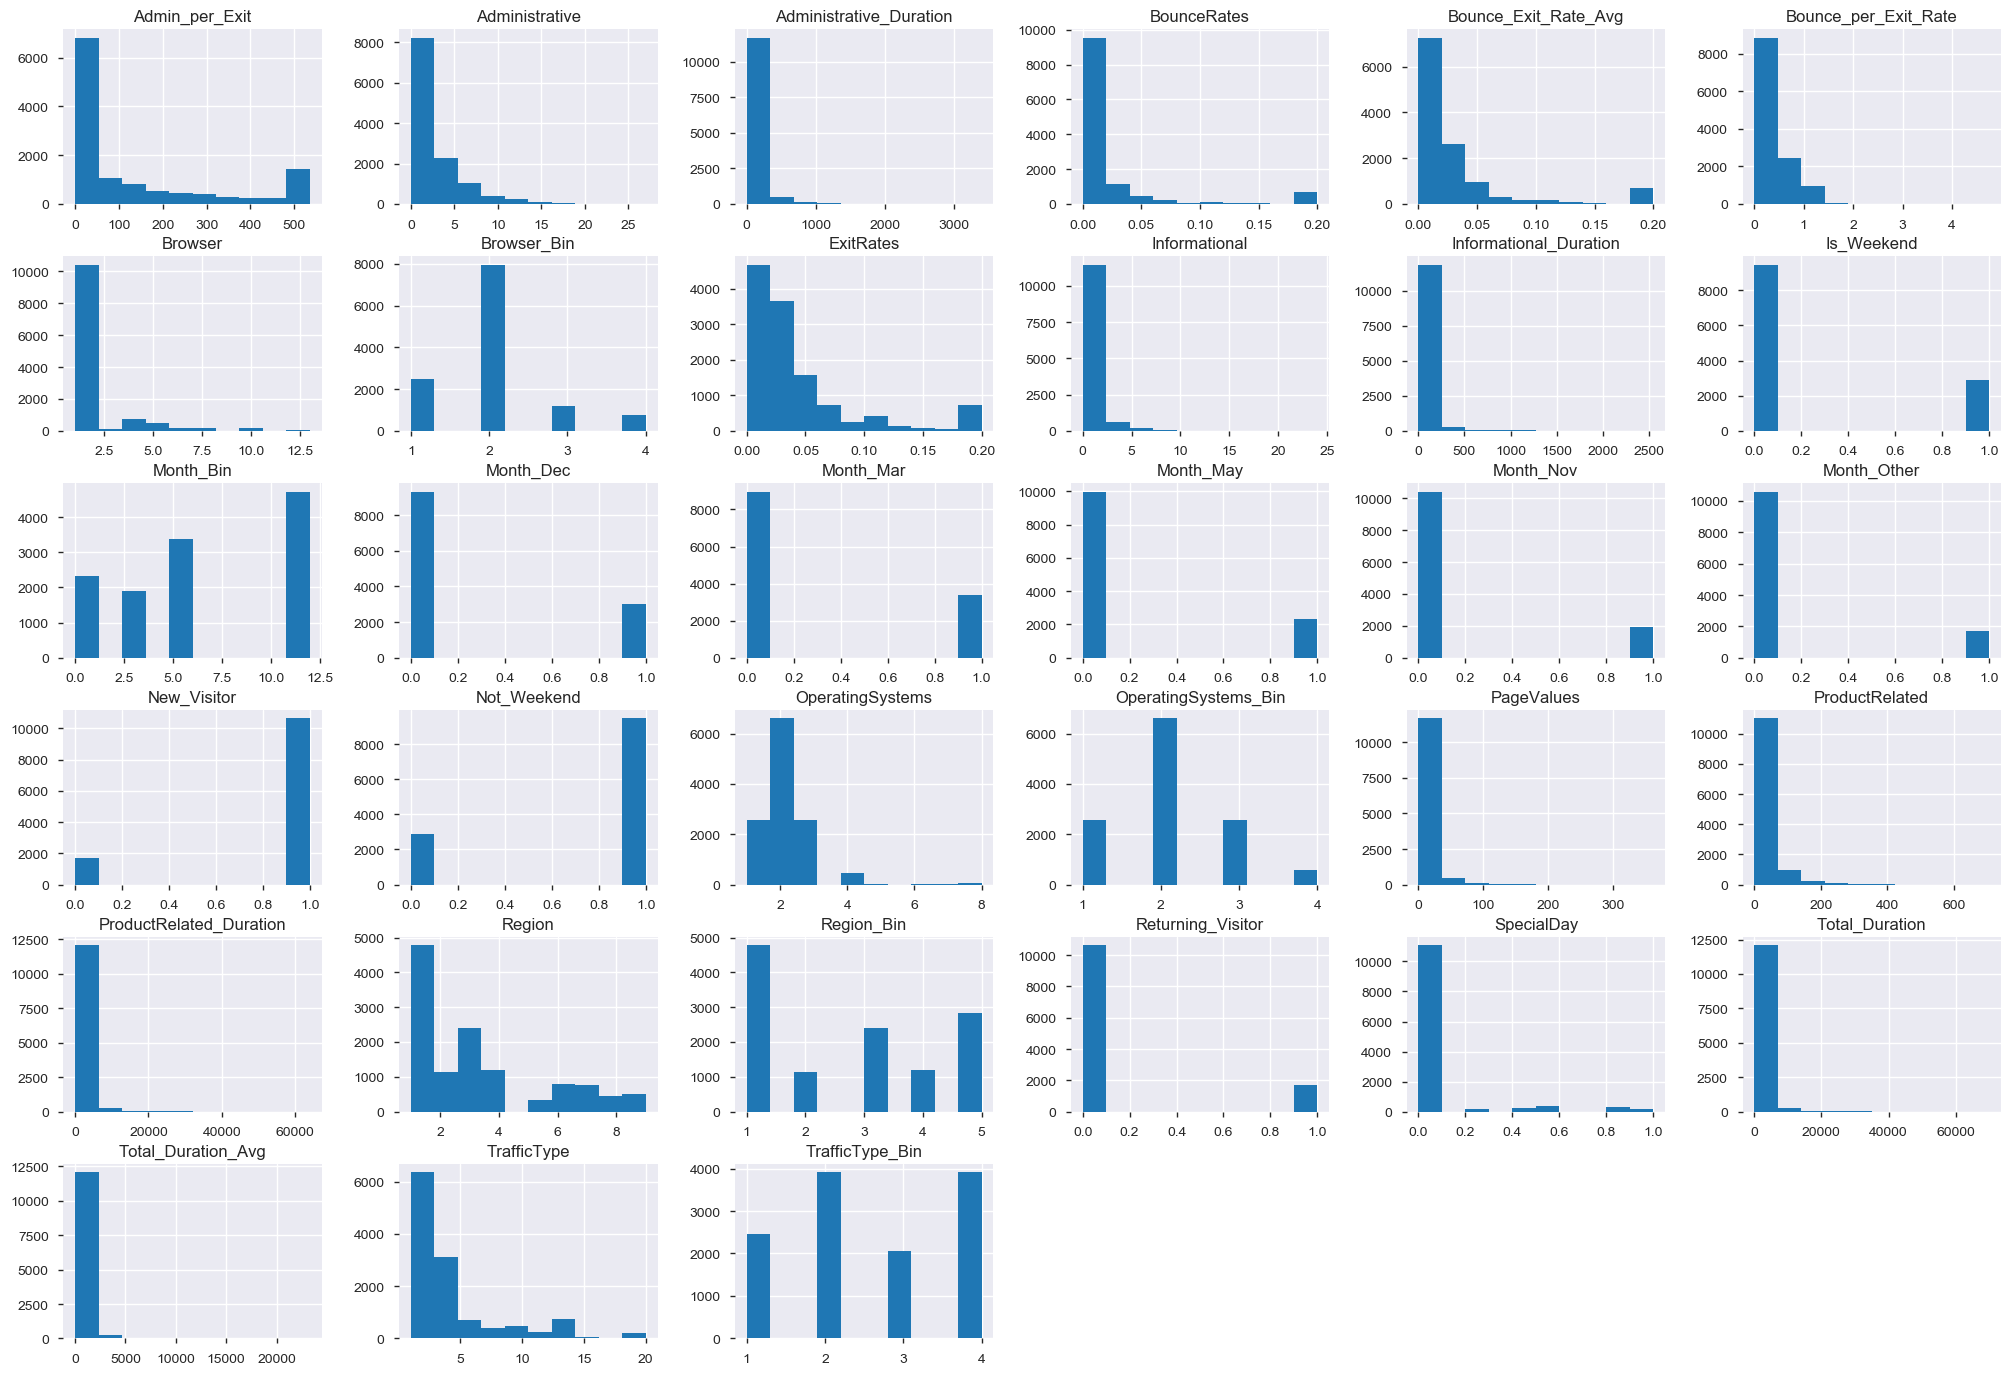

In [73]:
display(X.skew())
display(X.hist( figsize = (25,17)))

In [ ]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
transformed = transformer.transform(X)
transformed_df = pd.DataFrame(transformed,columns = cols_to_skew)

In [80]:
scaler = StandardScaler().fit(X[cols_to_skew])
standardized_X_skew_cols = scaler.transform(X[cols_to_skew])
standardized_X_skew_cols = pd.DataFrame(standardized_X_skew_cols,columns=cols_to_skew)
X[cols_to_skew]=standardized_X_skew_cols.loc[:,cols_to_skew]


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser_Bin_skew,Month_May_skew,Month_Nov_skew,Month_Mar_skew,Month_Dec_skew,Month_Other_skew,Returning_Visitor_skew,New_Visitor_skew,Not_Weekend_skew,Is_Weekend_skew
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,-1.389582,2.069487,-0.427739,-0.612532,-0.566798,-0.403582,-0.399087,0.399087,0.550552,-0.550552
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,-0.020103,2.069487,-0.427739,-0.612532,-0.566798,-0.403582,-0.399087,0.399087,0.550552,-0.550552
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,-1.389582,2.069487,-0.427739,-0.612532,-0.566798,-0.403582,-0.399087,0.399087,0.550552,-0.550552
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,-0.020103,2.069487,-0.427739,-0.612532,-0.566798,-0.403582,-0.399087,0.399087,0.550552,-0.550552
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,1.349375,2.069487,-0.427739,-0.612532,-0.566798,-0.403582,-0.399087,0.399087,-1.816360,1.816360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,1.349375,-0.483212,-0.427739,-0.612532,-0.566798,2.477811,-0.399087,0.399087,-1.816360,1.816360
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,-0.020103,-0.483212,-0.427739,-0.612532,1.764296,-0.403582,-0.399087,0.399087,-1.816360,1.816360
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,-0.020103,-0.483212,-0.427739,-0.612532,1.764296,-0.403582,-0.399087,0.399087,-1.816360,1.816360
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,-0.020103,-0.483212,-0.427739,-0.612532,1.764296,-0.403582,-0.399087,0.399087,0.550552,-0.550552


In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
Rescaled = transformer.transform(X)


In [87]:
display(X[cols_to_skew].describe())
display(X[skew_cols].describe())

,Administrative_skew,Administrative_Duration_skew,Informational_skew,Informational_Duration_skew,ProductRelated_skew,ProductRelated_Duration_skew,BounceRates_skew,ExitRates_skew,PageValues_skew,SpecialDay_skew,...,Browser_Bin_skew,Month_May_skew,Month_Nov_skew,Month_Mar_skew,Month_Dec_skew,Month_Other_skew,Returning_Visitor_skew,New_Visitor_skew,Not_Weekend_skew,Is_Weekend_skew
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,...,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,12330.000000,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,-2.996612e-17,6.338986e-17,-4.610172e-18,-2.074577e-17,4.610172e-17,-1.014238e-16,-5.993223e-17,3.227120e-17,1.060340e-16,-5.532206e-17,...,2.766103e-17,-1.475255e-16,3.688137e-17,1.844069e-16,0.000000,7.376275e-17,-9.450852e-17,1.198645e-16,-5.071189e-17,2.305086e-18
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,...,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-7.134884e-01,-6.243475e-01,-4.576830e-01,-8.863706e-01,-3.171778e-01,-3.088214e-01,...,-1.389582e+00,-4.832115e-01,-4.277391e-01,-6.125318e-01,-0.566798,-4.035820e-01,-3.990870e-01,-2.505720e+00,-1.816360e+00,-5.505517e-01
25%,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-5.560920e-01,-5.281214e-01,-4.576830e-01,-5.923930e-01,-3.171778e-01,-3.088214e-01,...,-2.010346e-02,-4.832115e-01,-4.277391e-01,-6.125318e-01,-0.566798,-4.035820e-01,-3.990870e-01,3.990870e-01,5.505517e-01,-5.505517e-01
50%,-3.959377e-01,-4.147639e-01,-3.964779e-01,-2.449305e-01,-3.087548e-01,-3.113566e-01,-3.934903e-01,-3.686913e-01,-3.171778e-01,-3.088214e-01,...,-2.010346e-02,-4.832115e-01,-4.277391e-01,-6.125318e-01,-0.566798,-4.035820e-01,-3.990870e-01,3.990870e-01,5.505517e-01,-5.505517e-01
75%,5.072280e-01,7.035981e-02,-3.964779e-01,-2.449305e-01,1.409492e-01,1.407881e-01,-1.109348e-01,1.425510e-01,-3.171778e-01,-3.088214e-01,...,-2.010346e-02,-4.832115e-01,-4.277391e-01,1.632568e+00,-0.566798,-4.035820e-01,-3.990870e-01,3.990870e-01,5.505517e-01,-5.505517e-01
max,7.431499e+00,1.876956e+01,1.849960e+01,1.786868e+01,1.513858e+01,3.280678e+01,3.667189e+00,3.229316e+00,1.916634e+01,4.718598e+00,...,2.718854e+00,2.069487e+00,2.337874e+00,1.632568e+00,1.764296,2.477811e+00,2.505720e+00,3.990870e-01,5.505517e-01,1.816360e+00


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Browser_Bin,Month_May,Month_Nov,Month_Mar,Month_Dec,Month_Other,Returning_Visitor,New_Visitor,Not_Weekend,Is_Weekend
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,...,2.014680,0.189294,0.154663,0.272830,0.243147,0.140065,0.137388,0.862612,0.767397,0.232603
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,...,0.730234,0.391758,0.361598,0.445432,0.429000,0.347068,0.344271,0.344271,0.422509,0.422509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,...,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
# creating the skew cols

skew_cols = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType','Admin_per_Exit', 'Bounce_Exit_Rate_Avg',
       'Bounce_per_Exit_Rate', 'Total_Duration', 'Total_Duration_Avg',
       'Browser_Bin','Month_May', 'Month_Nov', 'Month_Mar', 'Month_Dec',
       'Month_Other', 'Returning_Visitor', 'New_Visitor', 'Not_Weekend',
       'Is_Weekend' ]

 
for i  in skew_cols:

    X[i+'_skew'] = X[i]

#data.columns[67:]

#https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame
from skew_autotransform import skew_autotransform

cols_to_skew = ['Administrative_skew', 'Administrative_Duration_skew', 'Informational_skew',
       'Informational_Duration_skew', 'ProductRelated_skew', 'ProductRelated_Duration_skew',
       'BounceRates_skew', 'ExitRates_skew', 'PageValues_skew', 'SpecialDay_skew',
       'OperatingSystems_skew', 'Browser_skew', 'Region_skew', 'TrafficType_skew','Admin_per_Exit_skew', 'Bounce_Exit_Rate_Avg_skew',
       'Bounce_per_Exit_Rate_skew', 'Total_Duration_skew', 'Total_Duration_Avg_skew',
       'Browser_Bin_skew','Month_May_skew', 'Month_Nov_skew', 'Month_Mar_skew', 'Month_Dec_skew',
       'Month_Other_skew', 'Returning_Visitor_skew', 'New_Visitor_skew', 'Not_Weekend_skew',
       'Is_Weekend_skew' ]
# X = skew_autotransform(X,include = cols_to_skew, plot = True, exp = False, threshold = 0.01)

print('Original average skewness value was %2.2f' %(np.mean(abs(X.skew()))))
print('Average skewness after transformation is %2.2f' %(np.mean(abs(X.skew()))))

ModuleNotFoundError: No module named 'skew_autotransform'

In [ ]:
transformed_df.skew()

In [ ]:
from sklearn.preprocessing import power_transform
transformed = power_transform(X[], method='box-cox'))
[[-1.332... -0.707...]
 [ 0.256... -0.707...]
 [ 1.076...  1.414...]]

In [56]:
scaler = Normalizer().fit(X_train)
normalized_X_train = scaler.transform(X_train) 
normalized_X_test = scaler.transform(X_test)


In [60]:
normalized_X_train_df = pd.DataFrame(normalized_X_train)
normalized_X_test_df = pd.DataFrame(normalized_X_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247A2F96C88>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247A47F4160>,
      dtype=object)

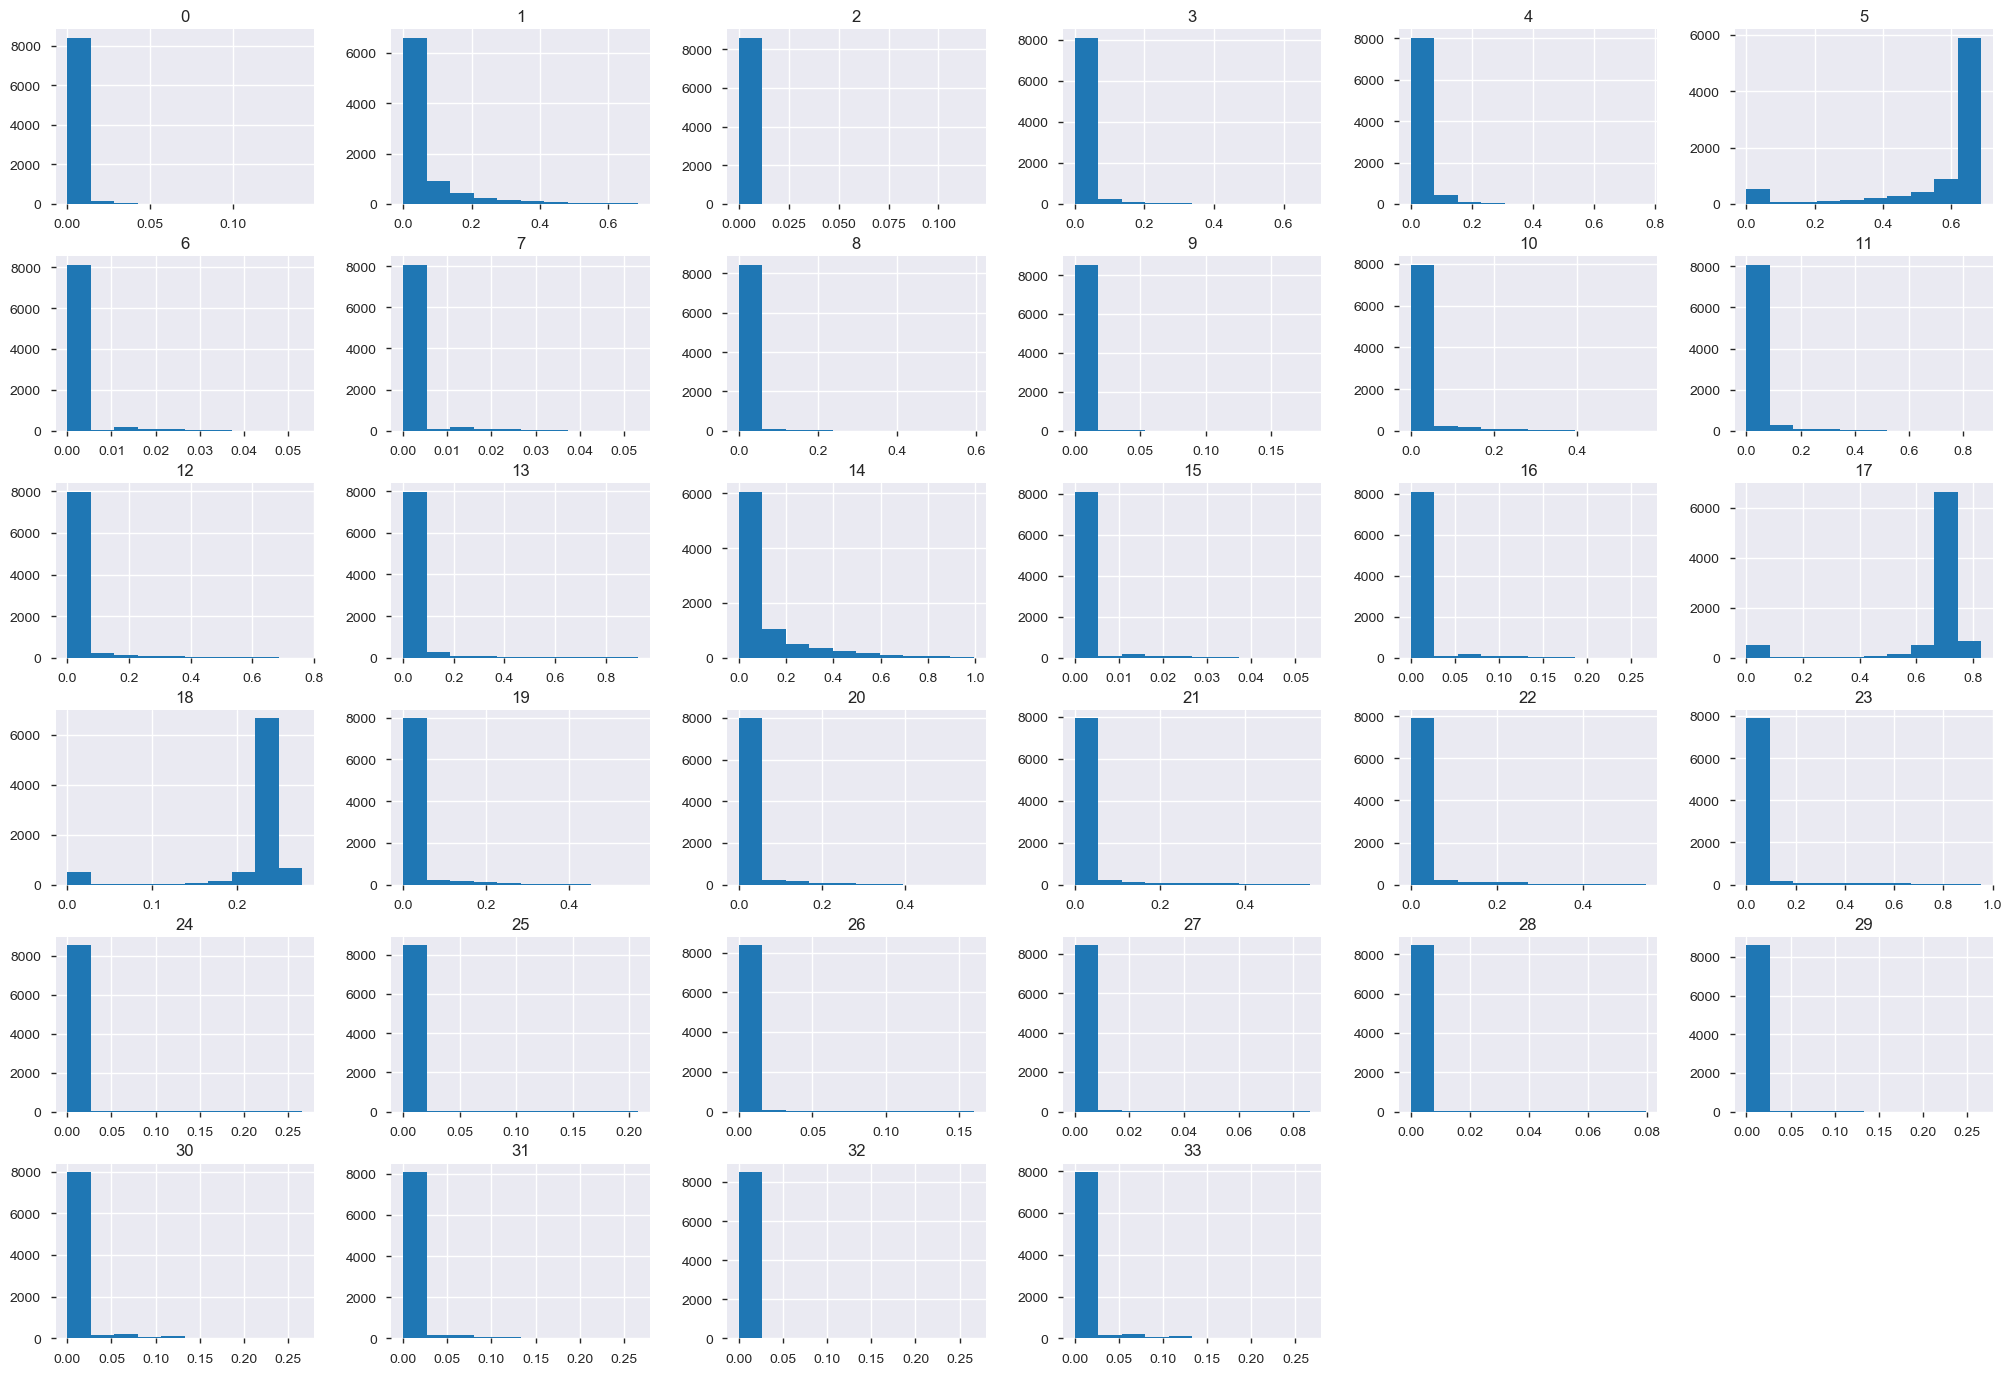

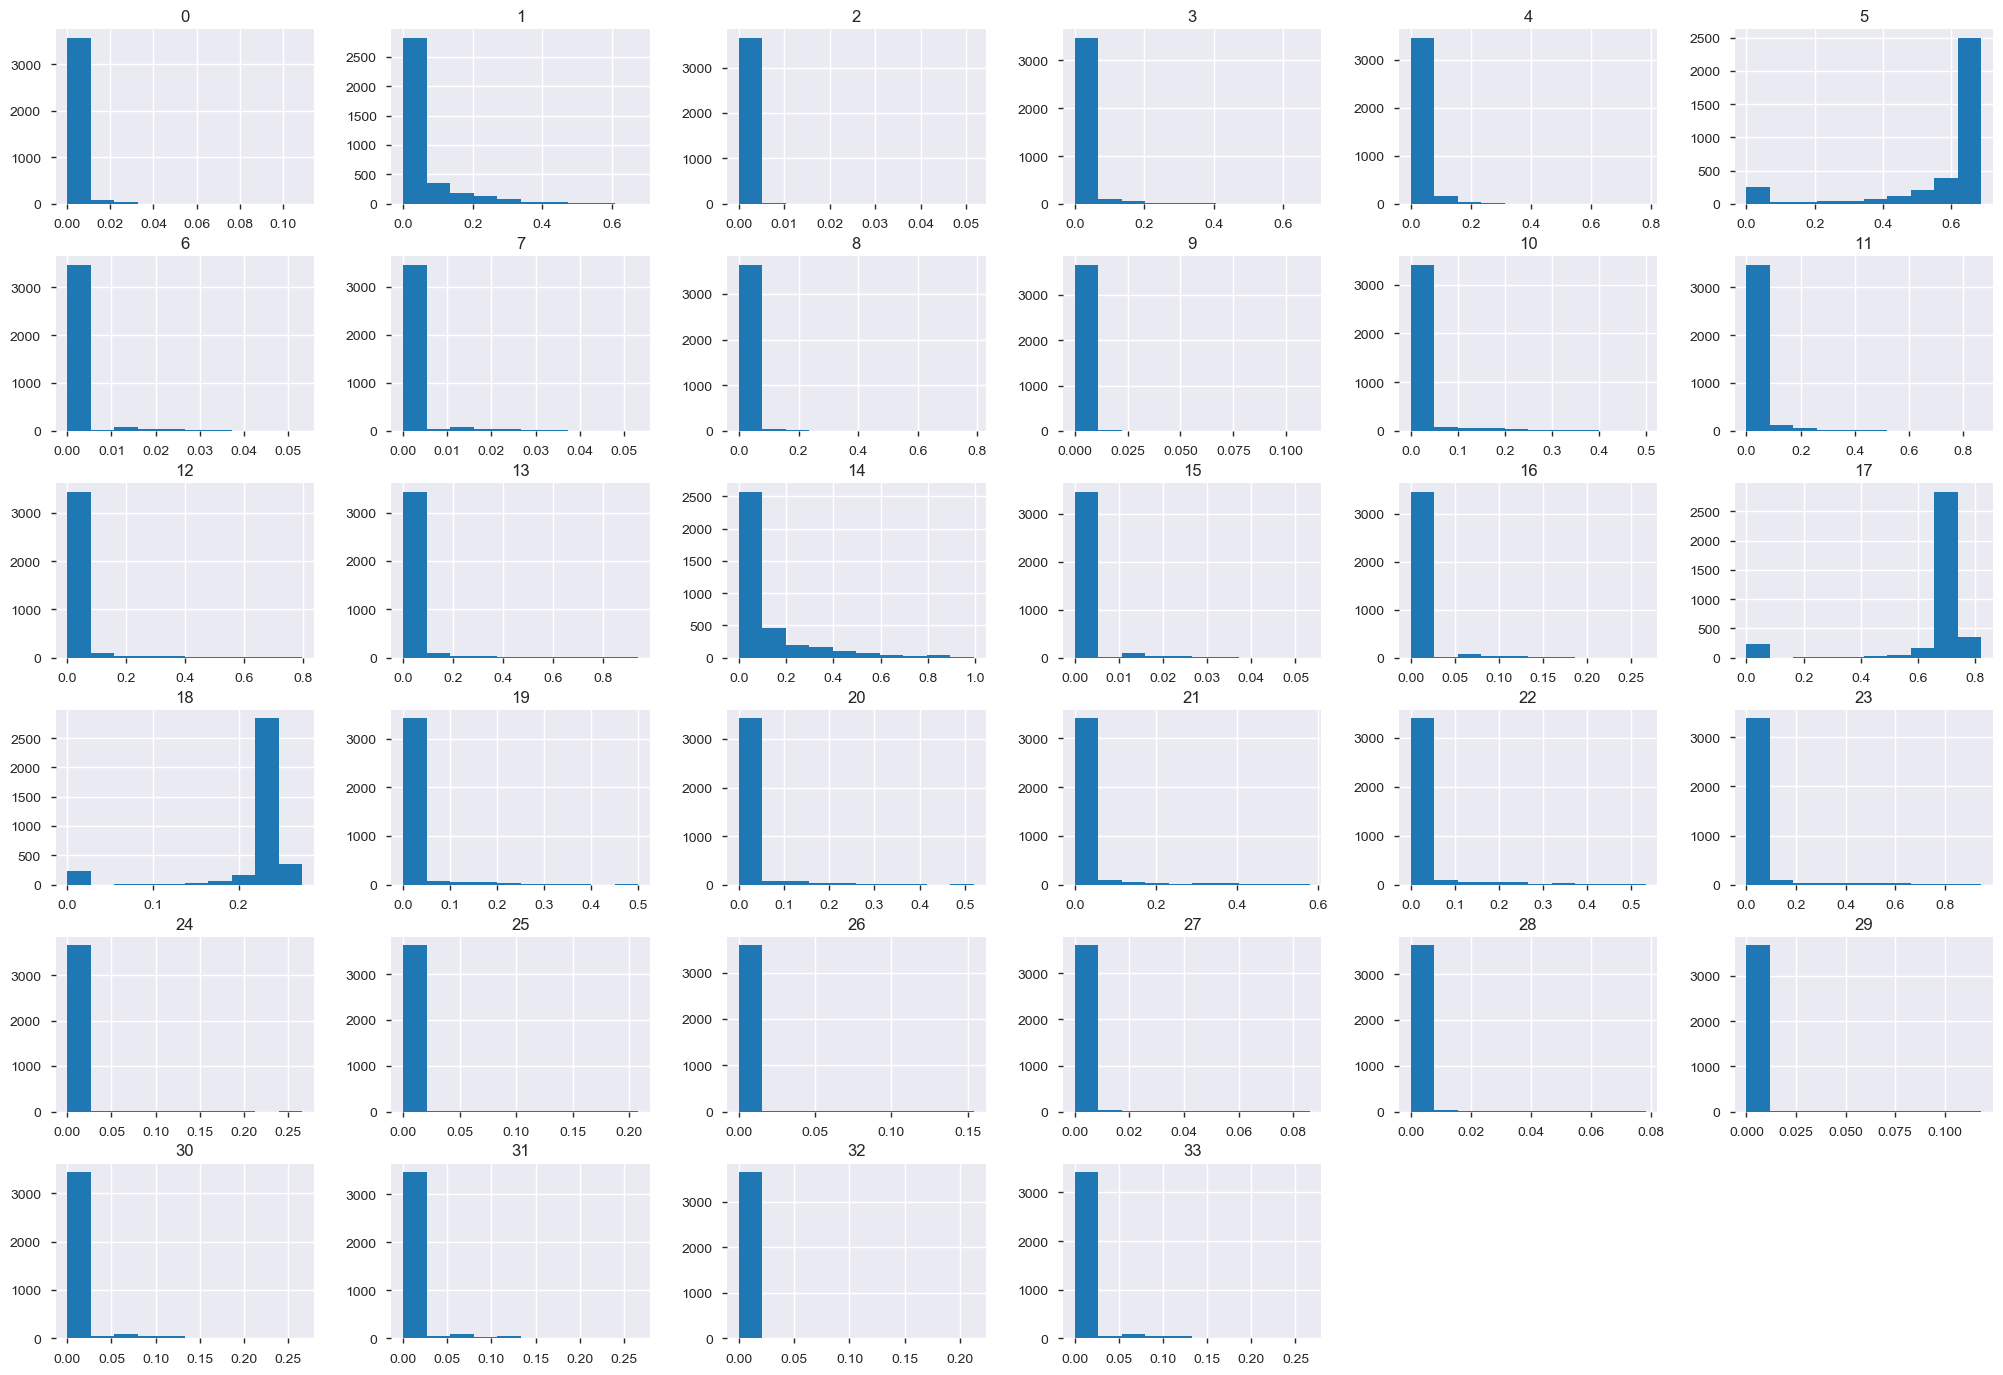

In [62]:
display(normalized_X_train_df.hist( figsize = (25,17)))
display(normalized_X_test_df.hist( figsize = (25,17)))

# Standardize the dataset

In [59]:
display(standardized_X_train.describe())
display(standardized_X_test.describe())

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

# Reshape the training dataset

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
# X, y = make_classification(n_classes=2, class_sep=2,
#     weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
#     n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=2019)
print('Original dataset shape %s' % Counter(y))
#Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state=42)
resampled_X_train,resampled_y2_train = sm.fit_resample(standardized_X_train,y2_train)
print('Resampled dataset shape %s' % Counter(resampled_y2_train))
#Resampled dataset shape Counter({0: 900, 1: 900})

In [ ]:
# resampled_df = pd.concat([X_res,y_res], axis =1, join = 'inner')

In [ ]:
resampled_df.sample(20)

#### _2. Data Cleaning:_

##### a. Recoding for "New" Features:
???


##### b. Normalizing:
???


##### c. Handling Outliers:
???


##### d. Dealing with Skewness:
???


##### e. Standardizing:
???


##### f. Reviewing Correlations to Identify Highly Related/Correlated Features to Avoid in Analysis:

# Correlation Heatmap for the dataframe
spearman =df.corr(method ='spearman')
plt.figure(figsize=(20,9))
sns.heatmap(spearman, annot=True)




# NEXT STEPS????

Note: Parts IV onward are for future work¶
Part IV: Data Analysis/Modeling
Part V: Validation
Part VI: Presentation/Visualization
Part VII: Sources

In [ ]:
profile = ProfileReport(df)

In [ ]:
profile

In [ ]:
df.dtypes
# The dataset has 10 numerical and 8 categorical variables. 
# Based on the initial import none of the 8 categorical are that data type

In [ ]:
df_cols = df.columns 
df_cols

In [ ]:
df_continuous= df[['Administrative','Informational', 'ProductRelated','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',        
                     'OperatingSystems', 'Browser', 'Region', 'TrafficType']]
df_cols2 =df_continuous.columns
# 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
#        'OperatingSystems', 'Browser', 'Region', 'TrafficType',

In [ ]:
sns.pairplot(df_continuous,corner=True)
# overlay Y on the Exitrate and Administration
# Feature Engeneer based on Exitrates

In [ ]:
display(df_continuous.hist( figsize = (25,17)))

In [ ]:
for attribute in df_cols2:
    sns.boxplot(x=df_continuous[attribute])
    plt.show()

In [ ]:
sample = df.sample(25)
display(sample)

sample_index = sample.index

In [ ]:
sample_index

In [ ]:
for attribute in df_cols:
    fig = px.box(df[attribute],y= attribute, points='outliers')
    fig.show()
 #   y=attribute

# Part 3: Prep the Data for Analysis  <a name="part3"></a>

##### Predict if a web user is going to make a purchase : __*Sale = 1 or No Sale = 0*__

In [ ]:
df.iloc[sample_index,:]

Encode the 'VisitorType','Weekend', 'Revenue' attributes to prepare for modeling

In [ ]:
enc = LabelEncoder()
df['VisitorType'] = enc.fit_transform(df['VisitorType'])
df['Weekend'] = enc.fit_transform(df['Weekend'])
df['Revenue'] = enc.fit_transform(df['Revenue'])
# df['Month'] = enc.fit_transform(df['Month']) # need to adjsut to cod ehte months correctly

In [ ]:
df.iloc[sample_index,:] # The attributes have been encoded correctly

In [ ]:
months = df['Month'].values
months

In [ ]:
def month_func(month) :
    if month == 'Jan':
        return int(1)
    elif month == 'Feb':
        return int(2)
    elif month == 'Mar':
        return int(3)
    elif month == 'Apr':
        return int(4)
    elif month == 'May':
        return int(5)
    elif month == 'June':
        return int(6)
    elif month == 'Jul':
        return int(7)
    elif month == 'Aug':
        return int(8)
    elif month == 'Sep':
        return int(9)
    elif month == 'Oct':
        return int(10)
    elif month == 'Nov':
        return int(11)
    elif month == 'Dec':
        return int(12)

In [ ]:
df['Month'] = df['Month'].apply(month_func)

In [ ]:
df.iloc[sample_index,:] # The attributes have been encoded correctly


In [ ]:
df['Month'].isnull().sum()

In [ ]:
#outlier_cols= ['Administrative','Informational', 'ProductRelated','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',        
 #                    'OperatingSystems', 'Browser', 'Region', 'TrafficType']

In [ ]:
# sourced from - https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414

# def assign_outlier(datacolumn):
#     Q1,Q3 = np.percentile(datacolumn , [25,75])
#     IQR = Q3 - Q1
#     lower_range = Q1 - (1.5 * IQR)
#     upper_range = Q3 + (1.5 * IQR)
#     datacolumn[datacolumn>upper_range] = upper_range
#     datacolumn[datacolumn<lower_range] = lower_range
#     return datacolumn

In [ ]:
# encoded_df = df.copy()
# encoded_df[outlier_cols].apply(assign_outlier)

In [ ]:
plt.style.use('ggplot')

classes = df['Revenue'].values
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Resampleing the dataset due to Imbalance :SMOTE 

In [ ]:
X,y = df.iloc[:,:-1],df.iloc[:,-1]

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
# X, y = make_classification(n_classes=2, class_sep=2,
#     weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
#     n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=2019)
print('Original dataset shape %s' % Counter(y))
#Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
#Resampled dataset shape Counter({0: 900, 1: 900})

In [ ]:
resampled_df = pd.concat([X_res,y_res], axis =1, join = 'inner')

In [ ]:
resampled_df.sample(20)

In [ ]:
plt.style.use('ggplot')

classes = resampled_df['Revenue'].values
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
display(resampled_df.hist( figsize = (25,17)))

# Part 4: Placeholder <a name="part4"></a>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3,random_state=500) 

In [ ]:
scaler = StandardScaler().fit(X_train) 
standardized_X = scaler.transform(X_train) 
standardized_X_test = scaler.transform(X_test)


In [ ]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(standardized_X, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(standardized_X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Part 5: Placeholder  <a name="part5"></a>

In [ ]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_res, y_res, test_size=0.3,random_state=500) 

In [ ]:
scaler = StandardScaler().fit(X_train) 
standardized_X_svc = scaler.transform(X_train_svc) 
standardized_X_test_svc = scaler.transform(X_test_svc)

In [ ]:
#Create a SVC Classifier
svc = SVC(kernel='linear',cache_size=7000)

#Train the model using the training sets
svc.fit(standardized_X_svc, y_train_svc)

#Predict the response for test dataset
y_pred_svc = svc.predict(standardized_X_test_svc)

In [ ]:
print("Accuracy_svc:",metrics.accuracy_score(y_test_svc, y_pred_svc))

In [ ]:
cnf_matrix_svc = metrics.confusion_matrix(y_test_svc, y_pred_svc)
cnf_matrix_svc

In [ ]:
class_names_svc=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_svc = np.arange(len(class_names_svc))
plt.xticks(tick_marks_svc, class_names_svc)
plt.yticks(tick_marks_svc, class_names_svc)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix svc', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(y_test_svc, y_pred_svc))
print("Accuracy_svc:",metrics.accuracy_score(y_test_svc, y_pred_svc))

# Part 6: Placeholder  <a name="part6"></a>

# Part 7: Placeholder  <a name="part7"></a>

# Part 7: Sources  <a name="part8"></a>
1. https://i.ytimg.com/vi/CRKn-9gVNBw/maxresdefault.jpg
2. https://support.google.com/analytics

# Sand Box Code

In [ ]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

In [ ]:
# df_continuous = df[['Administrative', 'Administrative_Duration', 'Informational',
#        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
#        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
#        'OperatingSystems', 'Browser', 'Region', 'TrafficType']]
# #df_continuous
# import plotly.express as px

# fig = px.scatter_matrix(df_continuous)
# fig.show()

In [ ]:
# https://plot.ly/python/box-plots/
#df = px.data.tips()
import plotly.express as px
for attribute in df_cols:
    fig = px.box(df_continuous[attribute],y= attribute ,points="outliers")
    fig.show()

In [ ]:
fig = px.parallel_coordinates(sample, color="Revenue",
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()
# labels={"species_id": "Species",
 #                 "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
  #                "petal_width": "Petal Width", "petal_length": "Petal Length", }

In [ ]:
display(df_continuous.describe())

In [ ]:
# When used for statistical data visualisation there are three important considerations: 
    # the order, the rotation, and the scaling of the axes. 
import plotly.express as px
fig = px.parallel_categories(sample, color = 'Weekend',color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=0.5)
fig.show()